In [1]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
!pip install tsplib95
!pip install elkai
import tsplib95
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import random
import elkai
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 3.6 MB/s eta 0:00:00


In [ ]:
def x_ray_1(a,b):
  x_ray_1 = tsplib95.distances.xray(a,b,sx=1.0, sy=1.0, sz=1.0)
  return x_ray_1
def x_ray_2(a,b):
  x_ray_2 = tsplib95.distances.xray(a,b,sx=1.25, sy=1.5, sz=1.15)
  return x_ray_2
def eudcl(a,b):
  eudcl = tsplib95.distances.euclidean(a,b)
  return eudcl
def att(a,b):
  att = tsplib95.distances.pseudo_euclidean(a,b)
  return att
def geo(a,b):
  geo = tsplib95.distances.geographical(a,b)
  return geo  

In [ ]:
#Explicit Functions

def upperRow(dim,Matrix_of_distances_1, problem):
  #Symmetrical TSP Explicit Upper row

  for i in range(0,dim-1):
        for j in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i])):
          Matrix_of_distances_1[i][j+i+1]= problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i][j]
          Matrix_of_distances_1[j+i+1][i]=Matrix_of_distances_1[i][j+i+1]
  return(Matrix_of_distances_1)

def lowerRow(dim, Matrix_of_distances_1, problem):
  #Symmetrical TSP Explicit Lower row

  for i in range(0,dim-1):
        for j in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i])):
          Matrix_of_distances_1[i+1][j]= problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][i][j]
          Matrix_of_distances_1[j][i+1]=Matrix_of_distances_1[i+1][j]

  return(Matrix_of_distances_1)

def asymfullMatrix(dim, Matrix_of_distances_1, problem):
  #Assymetrical TSP Explicit (full matrix every time )

  float_formatter = "{:.0f}".format
  np.set_printoptions(formatter={'float_kind':float_formatter})
  all_numbers=[]
  for z in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmoi_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmoi_seiras])
  metritis_arithmou=0
  for i in range(dim):
    for j in range(dim):
      Matrix_of_distances_1[i][j]=all_numbers[metritis_arithmou]
      metritis_arithmou+=1

  return(Matrix_of_distances_1)

def sopfullMatrix(dim, Matrix_of_distances_1, problem):
  #SOP Explicit (full matrix every time )

  float_formatter = "{:.0f}".format
  np.set_printoptions(formatter={'float_kind':float_formatter})
  all_numbers=[]
  for z in range(1,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmoi_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmoi_seiras])
  metritis_arithmou=0
  for i in range(dim):
    for j in range(dim):
      Matrix_of_distances_1[i][j]=all_numbers[metritis_arithmou]
      metritis_arithmou+=1

  return(Matrix_of_distances_1)

#CVRP Explicit lower_col
def lowerCol(dim, Matrix_of_distances_1, problem):
  
  stoixeia= dim*(dim-1)/2
  all_numbers=[]
  for z in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmos_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmos_seiras])
  metritis_arithmou=0
  for i in range(dim-1,0,-1):
    list_0=np.zeros(dim-i)
    sthlh=all_numbers[:i]
    all_numbers=all_numbers[i:]
    list_0=np.append(list_0,sthlh)
    Matrix_of_distances_1[:,dim-i-1]=list_0
  
  for i in range(dim):
    for j in range(i,dim):
      Matrix_of_distances_1[i][j]=Matrix_of_distances_1[j,i]
  return(Matrix_of_distances_1)

#CVRP Explicit upper_col
def upperCol(dim, Matrix_of_distances_1, problem):
  
  stoixeia= dim*(dim-1)/2
  all_numbers=[]
  for z in range(0,len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'])):
    for arithmos_seiras in range(len(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z])):
      all_numbers.append(problem.as_keyword_dict()['EDGE_WEIGHT_SECTION'][z][arithmos_seiras])
  metritis_arithmou=0
  for i in range(1,dim):
    list_0=np.zeros(dim-i)
    sthlh=all_numbers[:i]
    all_numbers=all_numbers[i:]
    list_0=np.append(sthlh,list_0)
    Matrix_of_distances_1[:,i]=list_0
  for j in range(dim):
    for i in range(j,dim):
      Matrix_of_distances_1[i][j]=Matrix_of_distances_1[j,i]
  return(Matrix_of_distances_1)

In [ ]:
#HCP function

def hcp(dim, problem):
  Matrix_of_distances_1 = np.zeros((dim, dim))
  #Parse EDGE_DATA_SECTION to string, replace special characters and split it
  string = str(problem.as_keyword_dict()['EDGE_DATA_SECTION'])
  string = string.replace("{", "")
  string = string.replace("}", "")
  string = string.replace(":", "")
  string = string.replace("]", "")
  string = string.replace("[", ",")
  string = string.split(',')

  #Append each string as int number into a list
  nodes = []
  for item in string:
    for subitem in item.split():
        if(subitem.isdigit()):
            nodes.append(int(subitem))

  #Two separate lists: from and to nodes
  node_1 = []
  node_2 = []
  for i in range(0, (len(nodes)-1), 2):
    node_1.append(nodes[i])
  for j in range(1, len(nodes), 2):
    node_2.append(nodes[j])

  #Calculate Matrix of distances
  for i in range(len(node_1)):
    Matrix_of_distances_1[node_1[i]-1][node_2[i]-1] = 1

  return(Matrix_of_distances_1, node_1, node_2)

In [ ]:
#Plotting Functions

#Plot HCP
def plot_hcp(node_1, node_2, threshold = 20):

  edges = list(zip(node_1, node_2))

  add_from = []
  for i in range(threshold):
    add_from.append(edges[i])

  G = nx.Graph()
  G.add_edges_from(add_from)
  pos = nx.spring_layout(G)
  nx.draw_networkx(G, edgelist=[]) 
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 40)
  nx.draw_networkx_labels(G, pos)
  plt.title("Network Graph of the Problem")
  plt.show()

**'TSP' function**

In [ ]:
def tsp(path, prt=True, plot=True):
  """
  Parser που διαβάζει διάφορα στιγμιότυπα προβλημάτων τύπου 
  πλανόδιου πωλητή (Traveling Salesman Problem - TSP).

  Το ελέγξαμε για:
    1. Hamiltonian cycle problem (HCP) instances,
    2. Asymmetric traveling salesman problem (ATSP) instances,
    3. Sequential ordering problem (SOP) instances,
    4. Capacitated vehicle problem (CVRP) instances,
    5. EDGE_WEIGHT_TYPE = 'EXPLICIT',
    6. EDGE_WEIGHT_TYPE = 'EUC_3D',
    7. EDGE_WEIGHT_TYPE = 'XRAY1',
    8. EDGE_WEIGHT_TYPE = 'XRAY2',
    9. EDGE_WEIGHT_TYPE = 'GEO',
    10.EDGE_WEIGHT_TYPE = 'ATT',
    11.EDGE_WEIGHT_FORMAT = 'UPPER_ROW',
    12.EDGE_WEIGHT_FORMAT = 'LOWER_ROW'
  """
  global dist, problem
  try:
    problem = tsplib95.load(path)
  except Exception as e:
    print(e)
    return None
  
  name = problem.name
  comment = problem.comment
  dim = problem.dimension
  Matrix_of_distances_1 = np.zeros((dim,dim))
  problem_type = problem.type
  try:
    dist = problem.as_keyword_dict()['EDGE_WEIGHT_TYPE']
  except:
    dist = ''
  problem_dict = {'Name': name, 'Type': problem_type, 
                  'Dimension': dim, 'Comment': comment,
                  'Distance': dist}

  distances = {'ATT': att, 'EUC_3D': eudcl, 'XRAY1': x_ray_1,
              'XRAY2': x_ray_2, 'GEO': geo,'EUC_2D': eudcl}

  if problem_type == "HCP":
    format = problem.edge_data_format
    Matrix_of_distances_1, node_from, node_to = hcp(dim, problem)

  elif dist in distances:
    for i in range(1,dim+1):
      for j in range(i+1,dim+1):
        Matrix_of_distances_1[i-1][j-1] = \
          distances[dist](problem.as_keyword_dict()['NODE_COORD_SECTION'][i], 
          problem.as_keyword_dict()['NODE_COORD_SECTION'][j])
        Matrix_of_distances_1[j-1][i-1] = Matrix_of_distances_1[i-1][j-1]

    if problem_type == "CVRP":
      problem_dict['Capacity'] = problem.as_keyword_dict()['CAPACITY']
      problem_dict["Depots"] = problem.as_keyword_dict()['DEPOT_SECTION']

  elif dist == 'EXPLICIT':
    # print("There is not distance between the points, we already have the distance matrix")
    # print("")
    try:
      format = problem.edge_weight_format
    except Exception as e:
      print(e)
    if format == 'UPPER_ROW':
      Matrix_of_distances_1 = upperRow(dim, Matrix_of_distances_1, problem)
    elif format == 'LOWER_ROW':
      Matrix_of_distances_1 = lowerRow(dim, Matrix_of_distances_1, problem)
    elif format == 'LOWER_COL':
      Matrix_of_distances_1 = lowerCol(dim, Matrix_of_distances_1, problem)
    elif format == 'UPPER_COL':
      Matrix_of_distances_1 = upperCol(dim, Matrix_of_distances_1, problem)
    elif format == 'FULL_MATRIX':
      if problem_type == 'ATSP':
        Matrix_of_distances_1 = asymfullMatrix(dim, Matrix_of_distances_1, problem)
      if problem_type == 'SOP':
        Matrix_of_distances_1 = sopfullMatrix(dim, Matrix_of_distances_1, problem)

  else:
    print('Unable to parse file')


  problem_dict['Weight Matrix'] = Matrix_of_distances_1

  if dist != 'EXPLICIT':
    problem_dict['Node Coordinates'] = problem.node_coords
        
  if plot:
    if problem_type == "HCP":
      plot_hcp(node_from, node_to)
    else:
      #plotTSP([path], problem_dict['Node Coordinates'])
      G = problem.get_graph()
      nx.draw_networkx(G, node_size=50, edgelist=[])
      plt.title("Network Graph of the Problem")
      plt.show()

  if prt:
    for key, val in problem_dict.items():
      if key not in ['Node Coordinates', 'Weight Matrix']:
        print(f'{key}: {val}')
      else:
        print(f'{key}:\n{val}')

  return problem_dict

In [ ]:
def find_opt_tour(problem):
  distance_matrix=tsp(problem,prt=False,plot=False)['Weight Matrix']
  file_1=open(str(tsp(problem,prt=False,plot=False)['Name'])+'.opt.tour','w+')
  file_1.write('NAME : ' + str(tsp(problem,prt=False,plot=False)['Name']) + '.opt.tour\n')
  file_1.write('Comment : Optimal tour for ' + str(tsp(problem,prt=False,plot=False)['Name'])+'\n')
  file_1.write('TYPE : TOUR\n')
  file_1.write('DIMENSION : ' +str(tsp(problem,prt=False,plot=False)['Dimension'])+'\n')
  file_1.write('TOUR_SECTION \n')
  optimal_tour=elkai.solve_int_matrix(distance_matrix)
  for i in optimal_tour:
    file_1.write(str(i)+'\n')
  file_1.write(str(-1)+'\n')
  file_1.write('EOF')
  file_1.close()
  return optimal_tour





In [ ]:
def plot_optimal_tour_elk(nodes):
  num_of_nodes = len(nodes)
  G = nx.Graph()
  plt.figure(figsize=(10, 10))

  #Adds egdes along the graph 
  for i in range(num_of_nodes-1) :
      G.add_edge(nodes[i], nodes[i+1])

      #Convert the graph to a closed graph
      #if i == num_of_nodes-2:
        #G.add_edge(nodes[0], nodes[i+1])   

  green_nodes = [nodes[0]]
  red_nodes = [nodes[-1]]
  yellow_nodes = nodes[1:-1]

  pos = nx.spring_layout(G)
  nx.draw_networkx(G, pos=pos, nodelist=red_nodes,
                        node_color='#e82a2a', label='Finish Point', with_labels = True)
  nx.draw_networkx(G, pos=pos, nodelist=green_nodes,
                        node_color='#8ce218', label='Start Point', with_labels = True)
  nx.draw_networkx(G, pos=pos, nodelist=yellow_nodes,
                        node_color='#fbd120', label='Intermediate Points', with_labels = True)

  legend_elements = [Line2D([0], [0], marker='o', lw=0, markerfacecolor='#8ce218', markersize=15, color='black', label='Starting Point'),
                    Line2D([0], [0], marker='o', lw=0, markerfacecolor='#e82a2a', markersize=15, color='black', label='Finish Point'),
                    Line2D([0], [0], marker='o', lw=0, markerfacecolor='#fbd120', markersize=15, color='black', label='Intermediate Points')]

  # Create the figure
  plt.legend(handles=legend_elements, loc=0)
  plt.show()

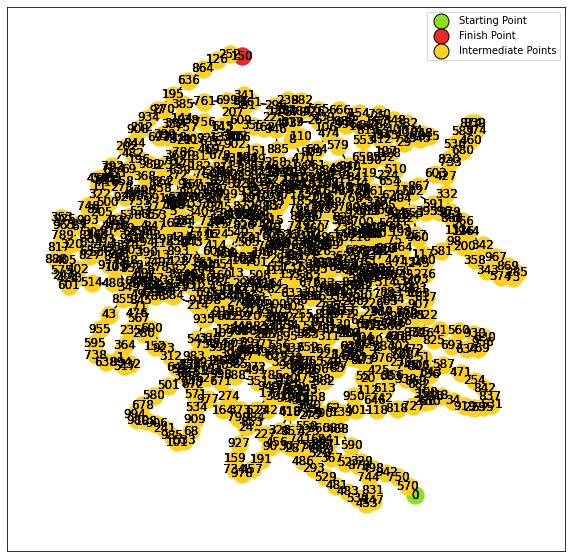

In [ ]:
#HCP 
nodes = find_opt_tour('alb1000.hcp')
plot_optimal_tour_elk(nodes)

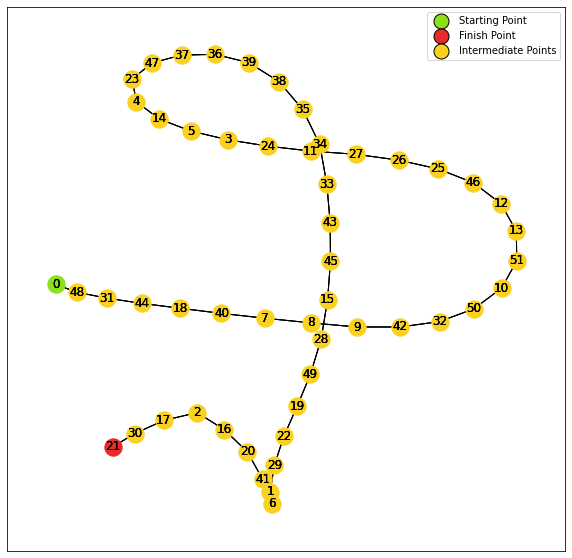

In [ ]:
#TSP 
nodes = find_opt_tour('berlin52.tsp')
plot_optimal_tour_elk(nodes)

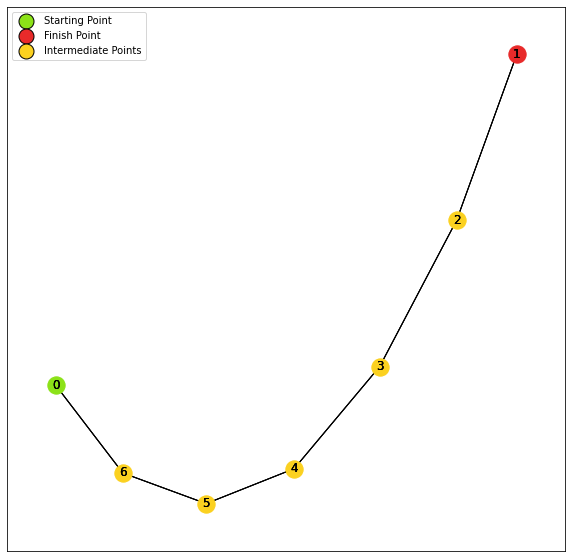

In [ ]:
#VRP
nodes = find_opt_tour('eil7.vrp')
plot_optimal_tour_elk(nodes)

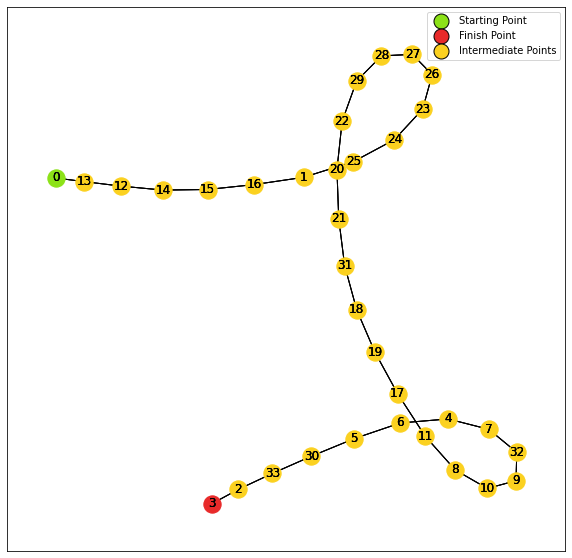

In [ ]:
#ATSP
nodes = find_opt_tour('ftv33.atsp')
plot_optimal_tour_elk(nodes)

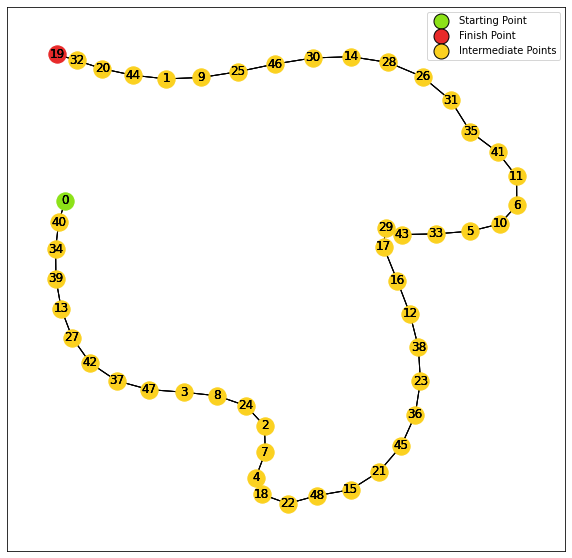

In [ ]:
#SOP
nodes = find_opt_tour('ESC47.sop')
plot_optimal_tour_elk(nodes)